
# Decision Tree: Iris dataset

### We have to create a Decision Tree classifier model to classify flowers into one of the three given possible classes

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#!brew install graphviz

### Understanding and Cleaning the Data

In [6]:
import sys
sys.path.insert(0,'/usr/local/lib/python3.9/site-packages')
sys.path

['/usr/local/lib/python3.9/site-packages',
 '/content',
 '/env/python',
 '/usr/lib/python311.zip',
 '/usr/lib/python3.11',
 '/usr/lib/python3.11/lib-dynload',
 '',
 '/usr/local/lib/python3.11/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.11/dist-packages/IPython/extensions',
 '/root/.ipython']

### Import Libraries

In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Importing required packages for visualization
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

import warnings
warnings.filterwarnings("ignore")

### Import the IRIS Dataset

In [5]:
iris = pd.read_csv("https://raw.githubusercontent.com/PacktPublishing/Practical-Data-Science-using-Python/refs/heads/main/iris_csv.csv")
iris

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Exploratory Data Analysis

In [11]:
classes = iris['class'].unique().tolist()
classes

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [10]:
iris.groupby(['class']).mean()

,sepallength,sepalwidth,petallength,petalwidth
class,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Model Building and Evaluation

### Create the Predictor and Target sets

In [7]:
# Putting feature variable to X
X = iris.drop('class',axis=1)

# Putting response variable to y
y = iris['class']

### Train-Test Split

In [8]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state = 99)
X_train.head()

,sepallength,sepalwidth,petallength,petalwidth
10,5.4,3.7,1.5,0.2
25,5.0,3.0,1.6,0.2
13,4.3,3.0,1.1,0.1
131,7.9,3.8,6.4,2.0
65,6.7,3.1,4.4,1.4


### Create a DecisionnTreeClassifier object and Train

In [12]:
dt_iris = DecisionTreeClassifier()
dt_iris.fit(X_train, y_train)

DecisionTreeClassifier()

### Making Predictions on Training set

In [13]:
y_pred_train = dt_iris.predict(X_train)

print(classification_report(y_train, y_pred_train))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        38
Iris-versicolor       1.00      1.00      1.00        32
 Iris-virginica       1.00      1.00      1.00        35

       accuracy                           1.00       105
      macro avg       1.00      1.00      1.00       105
   weighted avg       1.00      1.00      1.00       105



#### Printing confusion matrix and accuracy

In [14]:
print(confusion_matrix(y_train,y_pred_train))
print(accuracy_score(y_train,y_pred_train))

[[38  0  0]
 [ 0 32  0]
 [ 0  0 35]]
1.0


### Making predictions on the Test Data

In [15]:
y_pred_default = dt_iris.predict(X_test)

print(classification_report(y_test, y_pred_default))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [16]:
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[12  0  0]
 [ 0 17  1]
 [ 0  1 14]]
0.9555555555555556


### Plotting the Decision Tree

To visualise decision trees in python, you need to install certain external libraries. You can read about the process in detail here: http://scikit-learn.org/stable/modules/tree.html

We need the ```graphviz``` library to plot a tree.

**Note**:<br>
Python requires library pydot and an external software graphviz to visualize the decision tree. If you are on wondows, you'll need to specify the path for the pydot library to access dot file from graphviz.

Please read the downloadable instructions to install graphviz. For Mac users, one way is to:
- Install the python graphviz module: ```pip install graphviz```
- Then install the Graphviz software on Mac, you do this using homebrew:
    - Install homebrew: https://docs.brew.sh/Installation
    - ```brew install graphviz```

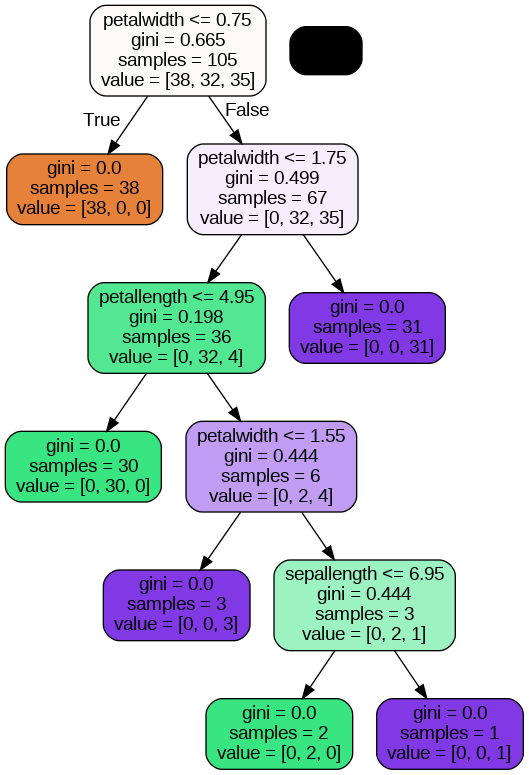

In [17]:
features = list(X_train.columns)
dot_data = StringIO()
export_graphviz(dt_iris, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Hyperparameter Tuning

The default tree is quite complex, and we need to simplify it by tuning the hyperparameters.

First, let's understand the parameters in a decision tree. You can read this in the documentation using ```help(DecisionTreeClassifier)```.


- **criterion** (Gini/IG or entropy): It defines the function to measure the quality of a split. Sklearn supports “gini” criteria for Gini Index & “entropy” for Information Gain. By default, it takes the value “gini”.
- **splitter**: It defines the strategy to choose the split at each node. Supports “best” value to choose the best split & “random” to choose the best random split. By default, it takes “best” value.
- **max_features**: It defines the no. of features to consider when looking for the best split. We can input integer, float, string & None value.
- **max_depth**: The max_depth parameter denotes maximum depth of the tree. It can take any integer value or None. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. By default, it takes “None” value.
- **min_samples_split**: This tells above the minimum no. of samples reqd. to split an internal node. If an integer value is taken then consider min_samples_split as the minimum no. If float, then it shows percentage. By default, it takes “2” value.
- **min_samples_leaf**: The minimum number of samples required to be at a leaf node. If an integer value is taken then consider - -min_samples_leaf as the minimum no. If float, then it shows percentage. By default, it takes “1” value.
- **max_leaf_nodes**: It defines the maximum number of possible leaf nodes. If None then it takes an unlimited number of leaf nodes. By default, it takes “None” value.
- **min_impurity_split**: It defines the threshold for early stopping tree growth. A node will split if its impurity is above the threshold otherwise it is a leaf.<br>



## Optimise Hyperparameters using Grid GridSearchCV and K-Fold Cross Validation

### Finding optimum max_depth

In [18]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 10)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters,
                    cv=n_folds,
                   scoring="accuracy", return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 10)}, return_train_score=True,
             scoring='accuracy')

In [19]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004370,0.001373,0.003464,0.000992,1,{'max_depth': 1},0.714286,0.714286,0.714286,0.666667,...,0.695238,0.023328,9,0.690476,0.690476,0.690476,0.702381,0.702381,0.695238,0.005832
1,0.003008,0.000803,0.002222,0.000494,2,{'max_depth': 2},0.952381,1.000000,0.857143,0.952381,...,0.942857,0.046657,7,0.964286,0.952381,0.988095,0.964286,0.964286,0.966667,0.011664
2,0.002667,0.000173,0.001931,0.000129,3,{'max_depth': 3},0.952381,1.000000,0.809524,0.952381,...,0.942857,0.069985,7,0.964286,0.976190,0.988095,0.988095,0.976190,0.978571,0.008909
3,0.003026,0.000357,0.002061,0.000214,4,{'max_depth': 4},1.000000,1.000000,0.857143,0.952381,...,0.952381,0.052164,6,0.976190,0.988095,1.000000,0.988095,1.000000,0.990476,0.008909
4,0.003028,0.000317,0.002406,0.000297,5,{'max_depth': 5},1.000000,1.000000,0.857143,1.000000,...,0.961905,0.055533,1,0.988095,1.000000,1.000000,1.000000,1.000000,0.997619,0.004762


Now let's visualize how train and test score changes with max_depth.

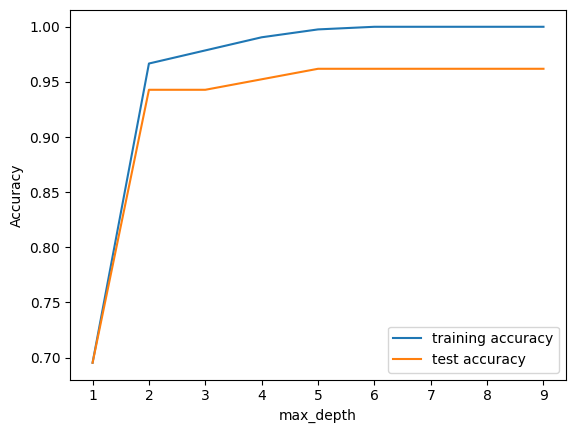

In [20]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_max_depth"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


<hr>

### Tuning min_samples_leaf

In [21]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(1, 40, 3)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters,
                    cv=n_folds,
                   scoring="accuracy", return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(1, 40, 3)},
             return_train_score=True, scoring='accuracy')

In [22]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003086,0.000330,0.002367,0.000420,1,{'min_samples_leaf': 1},1.000000,1.0,0.857143,1.000000,...,0.961905,0.055533,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.003069,0.000636,0.002553,0.000523,4,{'min_samples_leaf': 4},0.952381,1.0,0.857143,1.000000,...,0.961905,0.055533,1,0.964286,0.976190,0.988095,0.976190,0.976190,0.976190,0.007529
2,0.002620,0.000224,0.001848,0.000075,7,{'min_samples_leaf': 7},0.952381,1.0,0.857143,0.952381,...,0.942857,0.046657,3,0.964286,0.964286,0.988095,0.964286,0.964286,0.969048,0.009524
3,0.002473,0.000043,0.001855,0.000027,10,{'min_samples_leaf': 10},0.952381,1.0,0.857143,0.952381,...,0.942857,0.046657,3,0.964286,0.952381,0.988095,0.964286,0.964286,0.966667,0.011664
4,0.002736,0.000377,0.002158,0.000309,13,{'min_samples_leaf': 13},0.952381,1.0,0.857143,0.952381,...,0.942857,0.046657,3,0.964286,0.952381,0.988095,0.964286,0.964286,0.966667,0.011664


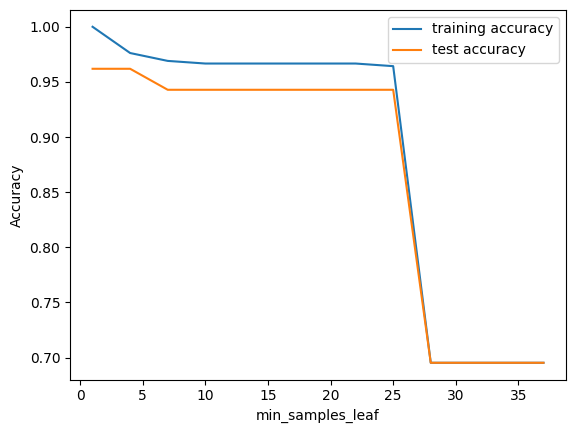

In [23]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Tuning min_samples_split

In [24]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(3, 40, 3)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters,
                    cv=n_folds,
                   scoring="accuracy", return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(3, 40, 3)},
             return_train_score=True, scoring='accuracy')

In [25]:
# Print the results of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004347,0.000533,0.003138,0.001003,3,{'min_samples_split': 3},1.000000,1.0,0.809524,1.000000,...,0.952381,0.073771,1,1.000000,1.000000,0.988095,1.000000,1.00000,0.997619,0.004762
1,0.002974,0.000405,0.002286,0.000585,6,{'min_samples_split': 6},1.000000,1.0,0.809524,0.952381,...,0.952381,0.073771,1,0.976190,0.988095,0.988095,0.988095,0.97619,0.983333,0.005832
2,0.002909,0.000267,0.002307,0.000394,9,{'min_samples_split': 9},0.952381,1.0,0.809524,0.952381,...,0.942857,0.069985,3,0.964286,0.976190,0.988095,0.988095,0.97619,0.978571,0.008909
3,0.002901,0.000126,0.002079,0.000098,12,{'min_samples_split': 12},0.952381,1.0,0.809524,0.952381,...,0.942857,0.069985,3,0.964286,0.976190,0.988095,0.988095,0.97619,0.978571,0.008909
4,0.002802,0.000224,0.002267,0.000654,15,{'min_samples_split': 15},0.952381,1.0,0.809524,0.952381,...,0.942857,0.069985,3,0.964286,0.976190,0.988095,0.988095,0.97619,0.978571,0.008909


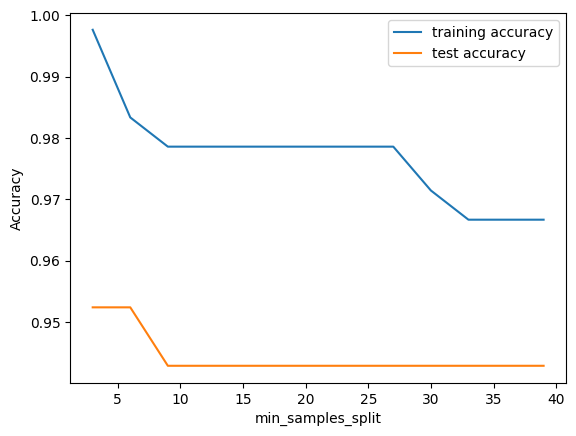

In [26]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_min_samples_split"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


## Grid Search to Find Optimal Hyperparameters

We can now use GridSearchCV to find multiple optimal hyperparameters together. Note that this time, we'll also specify the criterion (gini/entropy or IG).

In [ ]:
# Create the parameter grid
param_grid = {
    'max_depth': range(1, 10, 1),
    'min_samples_leaf': range(1, 40, 2),
    'min_samples_split': range(2, 30, 2),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
iristree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = iristree, param_grid = param_grid,
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 5040 candidates, totalling 25200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 25200 out of 25200 | elapsed:  1.2min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 40, 2),
                         'min_samples_split': range(2, 30, 2)},
             verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001993,0.000210,0.001302,0.000121,entropy,1,1,2,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
1,0.001561,0.000203,0.001174,0.000095,entropy,1,1,4,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
2,0.001380,0.000006,0.001166,0.000027,entropy,1,1,6,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
3,0.001383,0.000008,0.001047,0.000041,entropy,1,1,8,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
4,0.001470,0.000074,0.001032,0.000013,entropy,1,1,10,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,0.001430,0.000075,0.001099,0.000066,gini,9,39,20,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
5036,0.001374,0.000003,0.001129,0.000042,gini,9,39,22,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
5037,0.001380,0.000008,0.001115,0.000038,gini,9,39,24,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
5038,0.001423,0.000057,0.001036,0.000020,gini,9,39,26,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137


In [ ]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9714285714285715
DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3)


### Running the model with best parameters obtained from grid search

In [ ]:
# model with optimal hyperparameters
iristree1 = DecisionTreeClassifier(criterion = "entropy",
                                  random_state = 100,
                                  max_depth=4,
                                  min_samples_leaf=3,
                                  min_samples_split=2)
iristree1.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3,
                       random_state=100)

In [ ]:
# accuracy score
iristree1.score(X_test,y_test)

0.9555555555555556

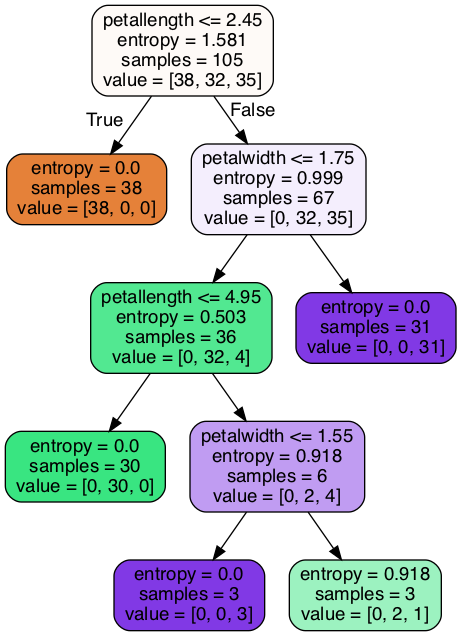

In [ ]:
# plotting the tree
dot_data = StringIO()
export_graphviz(iristree1, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

You can see that this tree is too complex to understand. Let's try reducing the max_depth and see how the tree looks.

In [ ]:
# tree with max_depth = 3
iristree2 = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=3,
                                  min_samples_leaf=4,
                                  min_samples_split=4)
iristree2.fit(X_train, y_train)

# score
print(iristree2.score(X_test,y_test))

0.9555555555555556


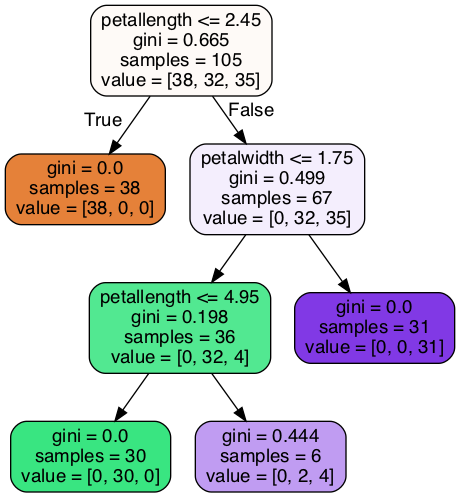

In [ ]:
# plotting tree with max_depth=3
dot_data = StringIO()
export_graphviz(iristree2, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
# Classification Metrix
from sklearn.metrics import classification_report,confusion_matrix
y_pred = iristree1.predict(X_test)
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [ ]:
# Print the Confusion Matrix
print(confusion_matrix(y_test,y_pred))

[[12  0  0]
 [ 0 17  1]
 [ 0  1 14]]
